# The Perceptron 

## Introduction

The Perceptron is a foundational model for binary classification within the field of neural networks. It consists of inputs, each weighted, which are summed together with a bias term. This sum passes through an activation function to produce an output. In this particular model, the activation function is a step function that outputs 1 for non-negative inputs and -1 for negative inputs. The Perceptron adjusts its weights to minimize classification errors during training, making it effective for datasets where classes can be separated by a linear boundary.
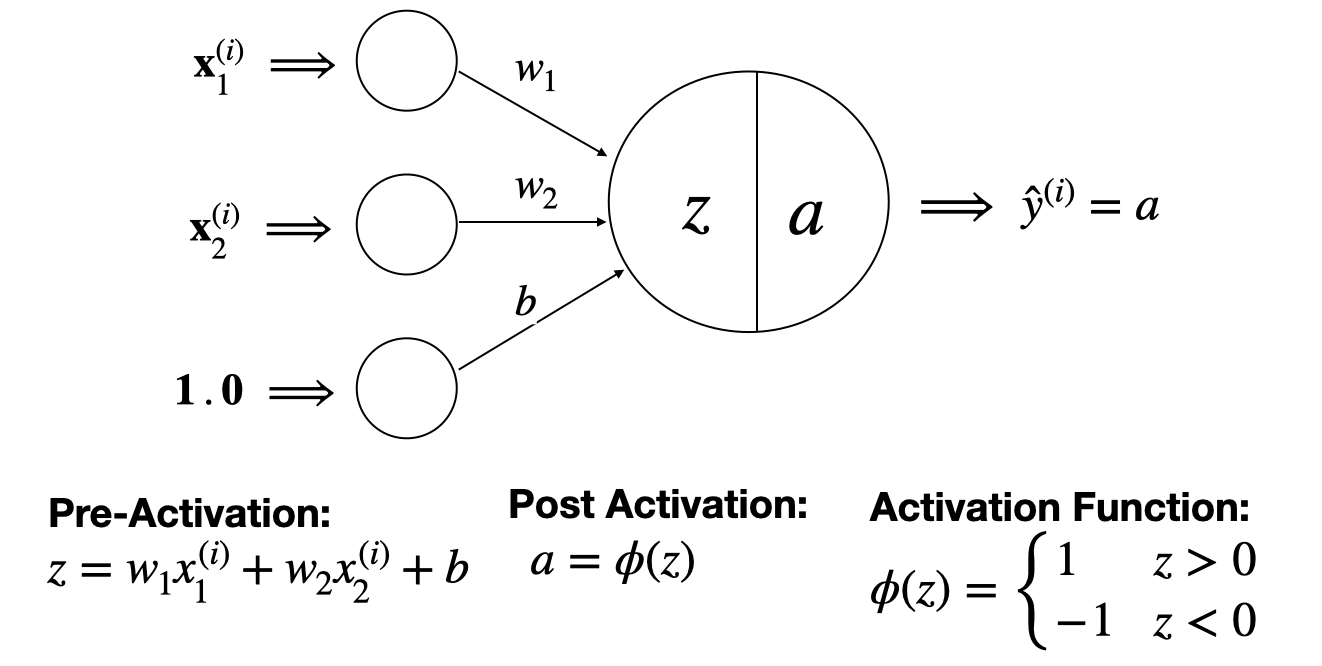

# Perceptron Algorithm Implementation

This notebook demonstrates the application of the single-layer Perceptron, a fundamental neural network model, to the Sonar, Mines vs. Rocks dataset. The goal is to classify sonar signals as bounced off a metal cylinder ('M') or a rock ('R'). We will implement the Perceptron from scratch and evaluate its ability to perform binary classification on this dataset.


In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

## Loading and Exploring the Dataset

The Sonar, Mines vs. Rocks dataset includes 60 features derived from sonar signals and a label that indicates whether the signal was reflected by a rock or a mine.


In [42]:
# Load the dataset
data = pd.read_csv('C:/Users/78641/Downloads/Sonar, Mines vs. Rocks Dataset.csv')

# Display the first few rows of the dataset
print(data.head())


   Freq_1  Freq_2  Freq_3  Freq_4  Freq_5  Freq_6  Freq_7  Freq_8  Freq_9  \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

   Freq_10  ...  Freq_52  Freq_53  Freq_54  Freq_55  Freq_56  Freq_57  \
0   0.2111  ...   0.0027   0.0065   0.0159   0.0072   0.0167   0.0180   
1   0.2872  ...   0.0084   0.0089   0.0048   0.0094   0.0191   0.0140   
2   0.6194  ...   0.0232   0.0166   0.0095   0.0180   0.0244   0.0316   
3   0.1264  ...   0.0121   0.0036   0.0150   0.0085   0.0073   0.0050   
4   0.4459  ...   0.0031   0.0054   0.0105   0.0110   0.0015   0.0072   

   Freq_58  Freq_59  Freq_60  Label  
0   0.0084   0.0090   0.0032      R  
1   0.0049   0.0052   

In [43]:
# Display dataset summary
print(data.describe())


           Freq_1      Freq_2      Freq_3      Freq_4      Freq_5      Freq_6  \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

           Freq_7      Freq_8      Freq_9     Freq_10  ...     Freq_51  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118387    0.1

In [44]:
# Check for any missing values
print(data.isnull().sum())

Freq_1     0
Freq_2     0
Freq_3     0
Freq_4     0
Freq_5     0
          ..
Freq_57    0
Freq_58    0
Freq_59    0
Freq_60    0
Label      0
Length: 61, dtype: int64


## Data Preprocessing

To prepare our data for modeling, we need to encode the categorical labels and scale the features.


In [45]:
# Encode categorical class labels to binary values
data['Label'] = data['Label'].map({'R': 0, 'M': 1})

# Separate features and labels
X = data.drop('Label', axis=1)
y = data['Label'].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Implementing the Perceptron

The Perceptron model is a single-layer neural network that uses a step function as its activation function. It updates its weights based on the errors made in predictions during training.


In [46]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, 0)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


## Training the Perceptron

Now we will train our Perceptron model using the training data and evaluate its performance.


In [47]:
# Instantiate and train the Perceptron
perceptron = Perceptron(learning_rate=0.01, n_iters=100)
perceptron.fit(X_train, y_train)


## Evaluating the Model

We will evaluate the trained Perceptron model using accuracy, confusion matrix, and classification report to understand its performance.


In [48]:
# Predicting on the test set
y_pred = perceptron.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{cls_report}")


Accuracy: 0.8333333333333334
Confusion Matrix:
[[14  2]
 [ 5 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.91      0.81      0.86        26

    accuracy                           0.83        42
   macro avg       0.82      0.84      0.83        42
weighted avg       0.85      0.83      0.84        42



The Perceptron model achieved an accuracy of 83.33%, which is quite respectable for a linear classifier. The confusion matrix shows that the model has more false negatives (5) than false positives (2), indicating a tendency to misclassify some positive instances (class 1) as negative (class 0).

Precision for class 1 is high (91%), meaning that when the model predicts class 1, it is correct most of the time. However, recall for class 1 is lower (81%), suggesting that the model misses some actual class 1 instances. Conversely, recall for class 0 is high (88%), indicating that the model is good at catching all class 0 instances, but precision for class 0 is lower (74%), which means there are some false positives.

The F1-score, which balances precision and recall, is quite balanced across the classes, with 0.80 for class 0 and 0.86 for class 1. Overall, the model seems to perform well, with a slight bias towards class 0. Further tuning or consideration of a non-linear model might improve performance if necessary.

## Decision Region Plot

Visualizing the decision regions provides a graphical representation of the areas in the feature space where the model predicts a certain class. Below, we'll plot the decision boundaries of our Perceptron model. Each region will be colored according to the class that the model predicts for points within that area.

This plot will help us understand the linear separability of the classes and how well the Perceptron model is able to classify the given data. It’s important to note that this type of visualization works best when the dataset has two features. If there are more, dimensionality reduction techniques like PCA should be applied to project the data onto two dimensions first.

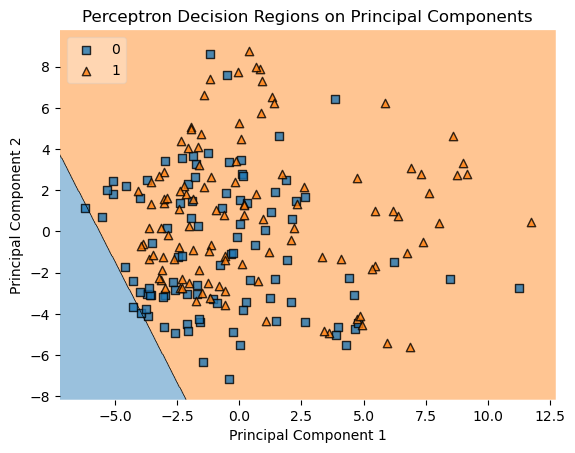

In [49]:
from sklearn.decomposition import PCA

# Reduce the dataset to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Train the perceptron on the reduced dataset
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X_pca, y)

# Plot the decision regions for the reduced dataset
plot_decision_regions(X_pca, y, clf=perceptron, legend=2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Perceptron Decision Regions on Principal Components')
plt.show()



The decision regions shown in the plot indicate that the Perceptron has established a linear boundary to separate classes 0 and 1 based on the two principal components. The boundary is positioned such that there are a notable number of class 1 points (triangles) on the class 0 side (blue region) and vice versa, reflecting some misclassifications.

The distribution of data points suggests that while the classes are not perfectly linearly separable, the Perceptron has still managed to find a reasonable line that divides the two classes, corresponding to the moderate accuracy of the model. The clustering of class 0 points in the lower-left side and the scattering of class 1 points towards the right indicate that Principal Component 1 might be a strong feature in separating the classes.

## Error Analysis Visualization

Error analysis is crucial to understand how well the model is learning from the data over time. In the following plot, we will visualize the number of misclassifications (errors) that the Perceptron makes in each epoch of the training process.

A decreasing trend in the number of misclassifications will indicate that the model is learning correctly. If the plot shows a high number of errors that doesn’t decrease with epochs, it could suggest that the data is not linearly separable, or that the model's hyperparameters need to be adjusted.


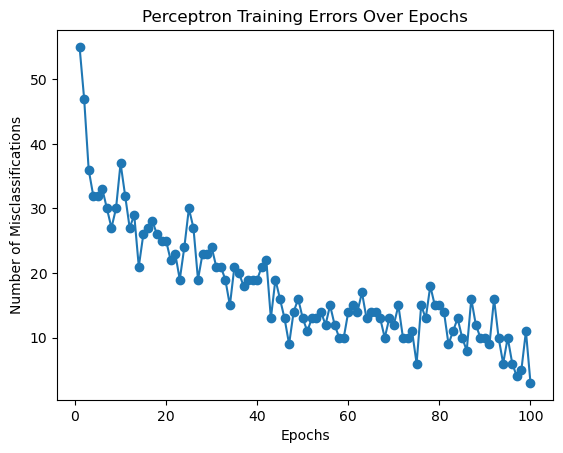

In [51]:
# Modifying the Perceptron class to record the errors
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.errors_ = []  # List to store the number of misclassification errors in each epoch

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            errors = 0  # Initialize errors at the start of each epoch
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output >= 0, 1, 0)
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
                errors += int(update != 0.0)
            self.errors_.append(errors)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

perceptron = Perceptron(learning_rate=0.01, n_iters=100)
perceptron.fit(X_train, y_train)

# Plot the error trend over epochs
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron Training Errors Over Epochs')
plt.show()


The plot indicates that the Perceptron model's performance improved significantly in the initial epochs, with a steep decline in the number of misclassifications. As training continued, the decrease in errors became more gradual, with some fluctuation but an overall downward trend. By the end of training, the number of errors had stabilized, suggesting the model had largely converged and further training would yield diminishing returns in reducing misclassifications. This trend is typical of learning in neural networks, where initial rapid learning is followed by slower refinement.